<a href="https://colab.research.google.com/github/charlesrugg/code_examples/blob/main/Stops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data into a pandas DataFrame
df = pd.read_csv("stops (1).csv", parse_dates=['Date'], index_col='Date')

df.describe

<bound method NDFrame.describe of                Sum  Stops per 100 layers  Pick Head  T-Car  Cranes  Strapper  \
Date                                                                           
2022-04-01   744.0                  18.4      271.0   37.0    97.0      41.0   
2022-04-02   664.0                  21.6      245.0   42.0    92.0      37.0   
2022-04-03   811.0                  21.3      315.0   39.0    98.0      43.0   
2022-04-04   907.0                  20.5      352.0   49.0    77.0      72.0   
2022-04-05  1170.0                  22.2      473.0   67.0    94.0      45.0   
...            ...                   ...        ...    ...     ...       ...   
2023-03-12   721.0                  13.8      237.0   52.0    48.0      27.0   
2023-03-13   817.0                  15.8      279.0   59.0    58.0      24.0   
2023-03-14   683.0                  19.1      196.0   26.0    62.0      21.0   
2023-03-15   606.0                  11.0      184.0   27.0    66.0      18.0   
NaT   

In [ ]:
# Create a histogram for each column
for col in df.columns:
    # Calculate the mean of the column
    avg = df[col].mean()
    
    # Create the histogram
    fig, ax1 = plt.subplots()
    if col == df.columns[0]: # Check if the column is a date column
        ax1.hist(df.index, bins='auto')
        ax1.set_xlabel("Date")
    else:
        ax1.hist(df[col])
        ax1.set_xlabel(col)
    ax1.set_ylabel("Count")
    
    # Add a second y-axis for the mean
    ax2 = ax1.twinx()
    ax2.axhline(y=avg, color='r', linestyle='-')
    ax2.set_ylabel("Mean", color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.set_ylim([0, df[col].max()])
    
    # Display the plot
    plt.title(col)
    plt.show()

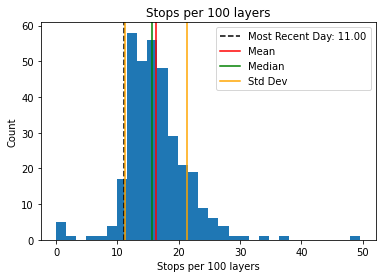

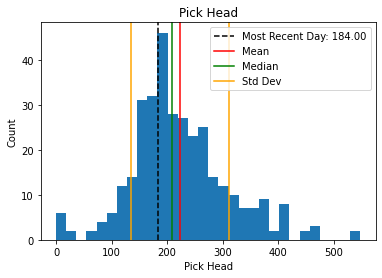

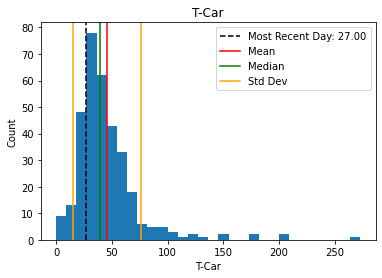

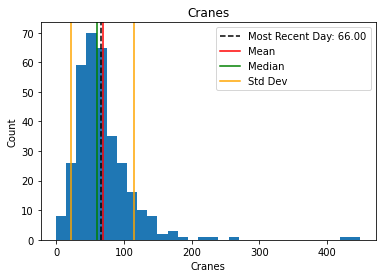

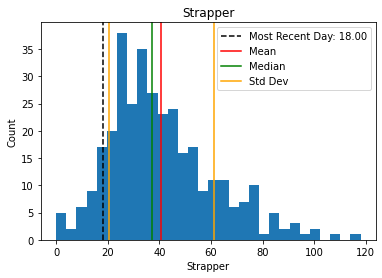

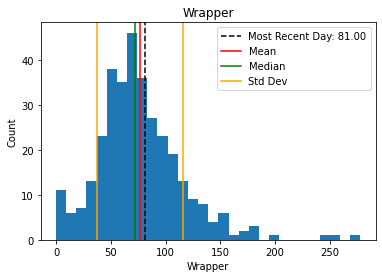

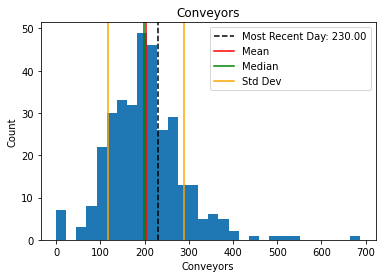

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data into a pandas DataFrame
df = pd.read_csv("stops.csv", parse_dates=[0], index_col=0)

# Create a histogram for each column
for col in df.columns[1:]:
    # Calculate the mean and standard deviation of the column
    avg = df[col].mean()
    std = df[col].std()

    # Resample the data to daily frequency and create a histogram
    daily_data = df[col].resample('D').mean()
    fig, ax1 = plt.subplots()
    ax1.hist(daily_data, bins=30)
    ax1.set_xlabel(col)
    ax1.set_ylabel("Count")

    # Add a black dashed line indicating the most recent day's data
    most_recent_day = df.loc[df.index == df.index.max()]
    most_recent_day_value = most_recent_day[col].values[0]
    ax1.axvline(x=most_recent_day_value, color='black', linestyle='--', label='Most Recent Day: {:.2f}'.format(most_recent_day_value))

    # Add mean, median, and standard deviation lines to the plot
    ax1.axvline(x=avg, color='red', linestyle='-', label='Mean')
    ax1.axvline(x=daily_data.median(), color='green', linestyle='-', label='Median')
    ax1.axvline(x=avg - std, color='orange', linestyle='-', label='Std Dev')
    ax1.axvline(x=avg + std, color='orange', linestyle='-')
    ax1.legend()

    # Display the plot
    plt.title(col)
    plt.show()


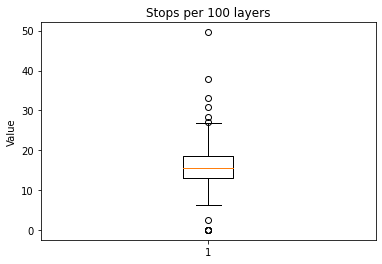

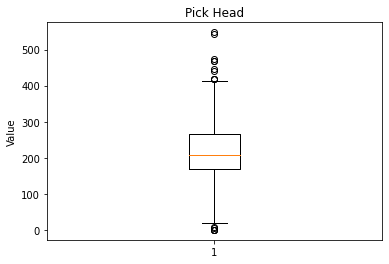

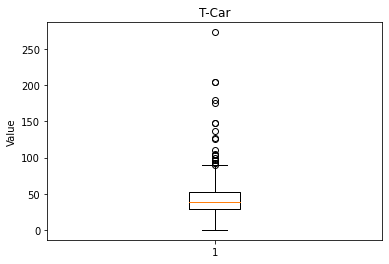

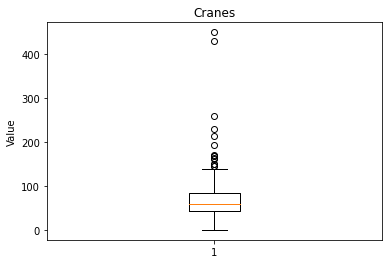

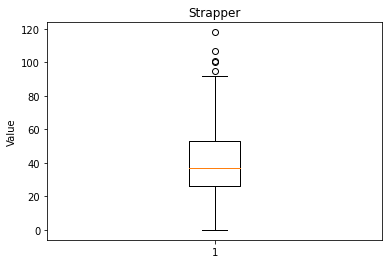

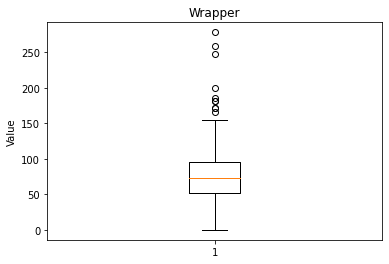

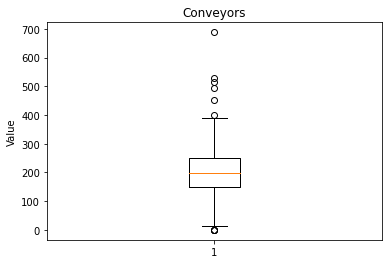

In [29]:


# Create box and whisker plots for each non-date column
non_date_cols = [col for col in df.columns[1:] if not pd.api.types.is_datetime64_any_dtype(df[col])]
for col in non_date_cols:
    fig, ax = plt.subplots()
    ax.boxplot(df[col].dropna())
    ax.set_title(col)
    ax.set_ylabel("Value")
    plt.show()


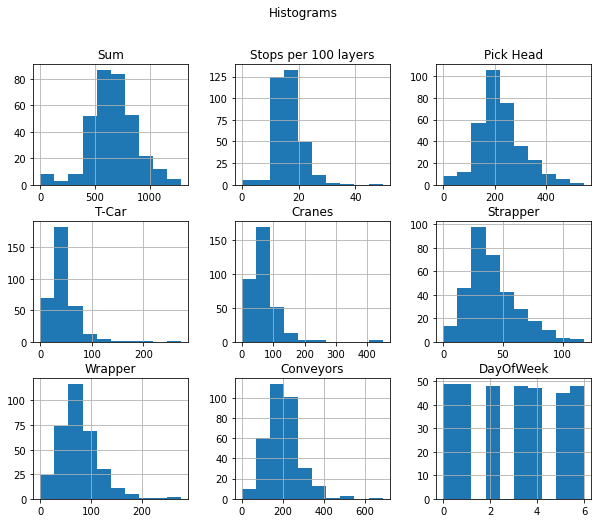

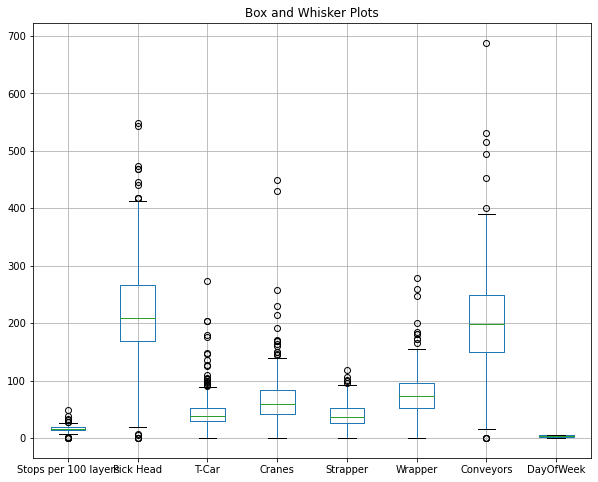

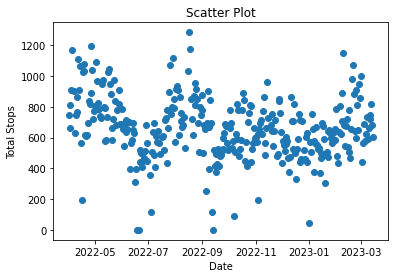

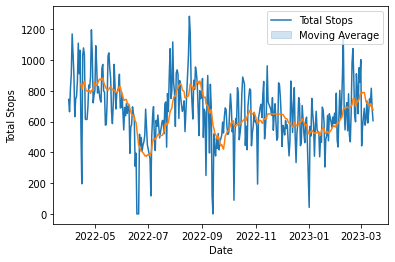

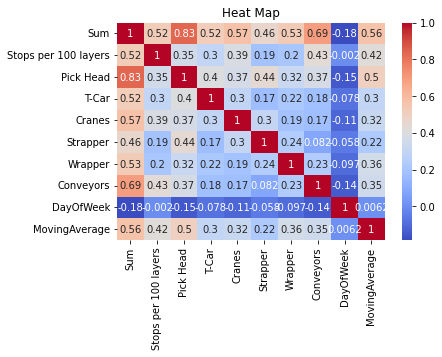

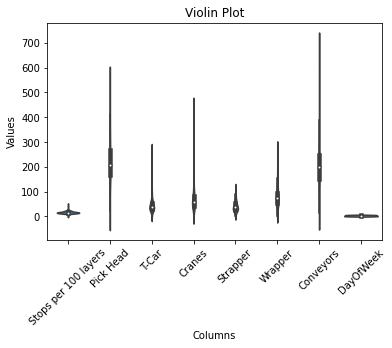

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Load the data into a pandas DataFrame
df = pd.read_csv("stops.csv", parse_dates=["Date"], index_col=0)

# Convert the 'Date' column to a datetime object
#df['Date'] = pd.to_datetime(df['Date'])

# Add a new column with the day of the week (0=Monday, 1=Tuesday, etc.)
df['DayOfWeek'] = df.index.dayofweek
#def drop_nan_rows(df):
    # Drop rows with any NaN values
 #   df_filtered = df.dropna()

 #   return df_filtered

# Drop NaN rows
#df = drop_nan_rows(df)

# Histograms
df.hist(figsize=(10,8))
plt.suptitle('Histograms')
plt.show()

# Box and whisker plots
df_box = df.drop(columns=['Sum'])
df_box.boxplot(figsize=(10,8))
plt.title('Box and Whisker Plots')
plt.show()

# Scatter plot
plt.scatter(df.index, df['Sum'])
plt.xlabel('Date')
plt.ylabel('Total Stops')
plt.title('Scatter Plot')
plt.show()

# Line plot
# plt.plot(df.index, df['Sum'])
# plt.xlabel('Date')
# plt.ylabel('Total Stops')
# plt.title('Line Plot')
# plt.show()

# Compute the rolling 14-day moving average of 'Total Stops'
df['MovingAverage'] = df['Sum'].rolling(window=14).mean()

# Plot the 'Total Stops' column with the 14-day moving average
sns.lineplot(x=df.index, y='Sum', data=df)
sns.lineplot(x=df.index, y='MovingAverage', data=df)
plt.xlabel('Date')
plt.ylabel('Total Stops')
plt.legend(labels=['Total Stops', 'Moving Average'])
plt.show()

# Heat map
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heat Map')
plt.show()

# Violin plot
df_box_melted = pd.melt(df_box)
sns.violinplot(x='variable', y='value', data=df_box_melted)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Violin Plot')
plt.xticks(rotation=45)
plt.show()



In [ ]:
print(df.columns)

Index(['Sum', 'Stops per 100 layers', 'Pick Head', 'T-Car', 'Cranes',
       'Strapper', 'Wrapper', 'Conveyors'],
      dtype='object')


In [ ]:
df.describe

<Axes: xlabel='Sum', ylabel='Count'>

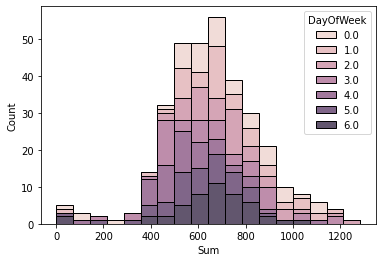

In [ ]:
sns.histplot(x='Sum', hue='DayOfWeek', data=df, multiple='stack')

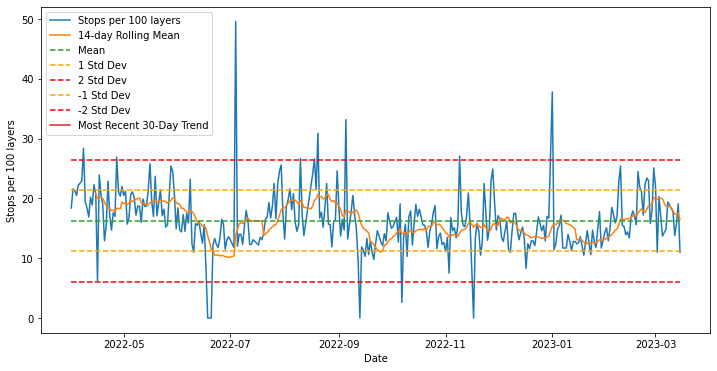

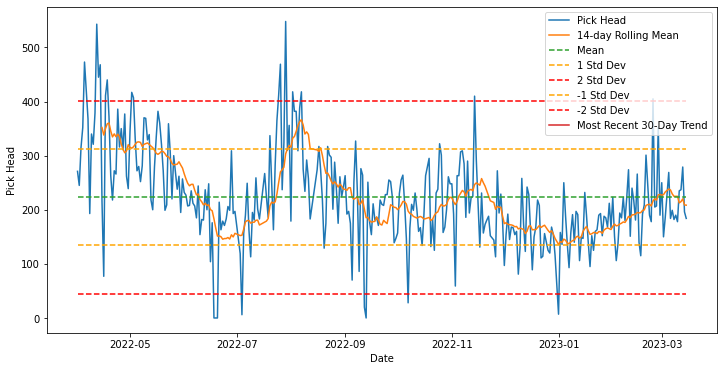

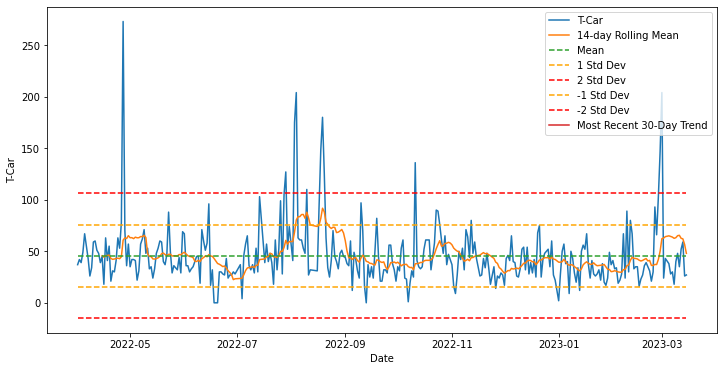

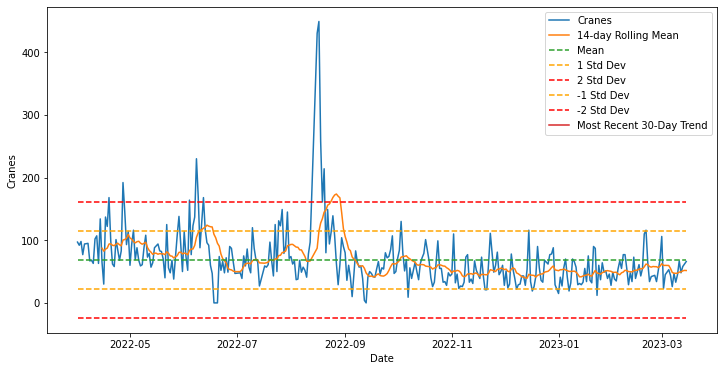

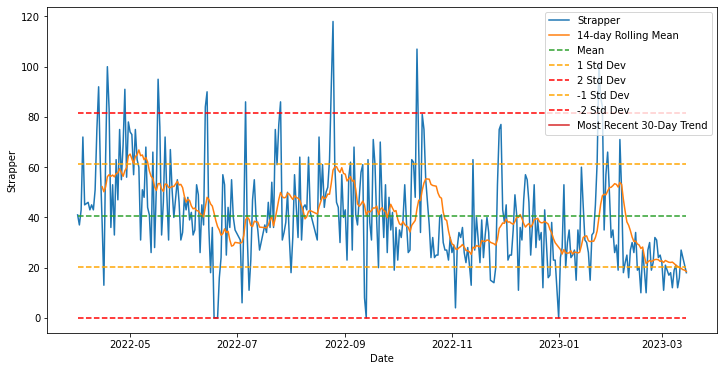

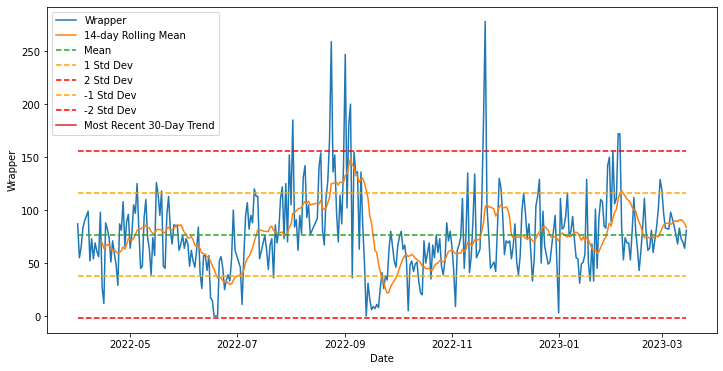

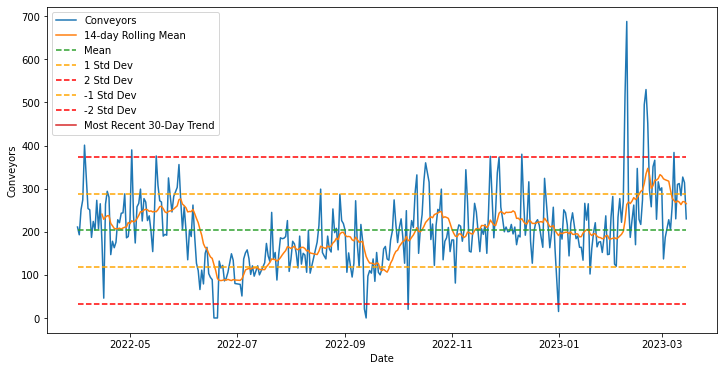

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data into a pandas DataFrame
df = pd.read_csv("stops.csv", parse_dates=[0], index_col=0)

# Calculate the mean and standard deviation for each column
means = df.mean()
stds = df.std()

# Create a line chart for each column
for col in df.columns[1:]:
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(df.index, df[col], label=col)
    ax.plot(df.index, df[col].rolling(window=14).mean(), label='14-day Rolling Mean')
    ax.plot(df.index, [means[col]] * len(df), label='Mean', linestyle='--')
    ax.plot(df.index, [means[col] + stds[col]] * len(df), label='1 Std Dev', linestyle='--', color='orange')
    ax.plot(df.index, [means[col] + 2*stds[col]] * len(df), label='2 Std Dev', linestyle='--', color='red')
    ax.plot(df.index, [means[col] - stds[col]] * len(df), label='-1 Std Dev', linestyle='--', color='orange')
    ax.plot(df.index, [means[col] - 2*stds[col]] * len(df), label='-2 Std Dev', linestyle='--', color='red')
    x_recent = df.index[-30:].astype(np.int64) // 10 ** 9  # Convert datetime to Unix timestamp
    y_recent = df[col][-30:]
    ax.plot(x_recent, np.poly1d(np.polyfit(x_recent, y_recent, 1))(x_recent), label='Most Recent 30-Day Trend')
    ax.set_xlabel('Date')
    ax.set_ylabel(col)
    ax.legend()

# Display the plot
plt.show()


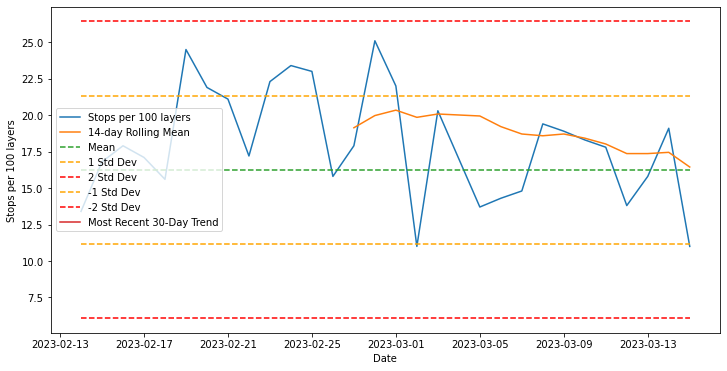

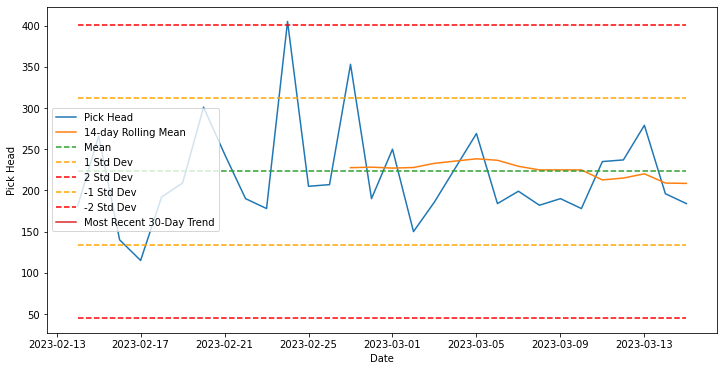

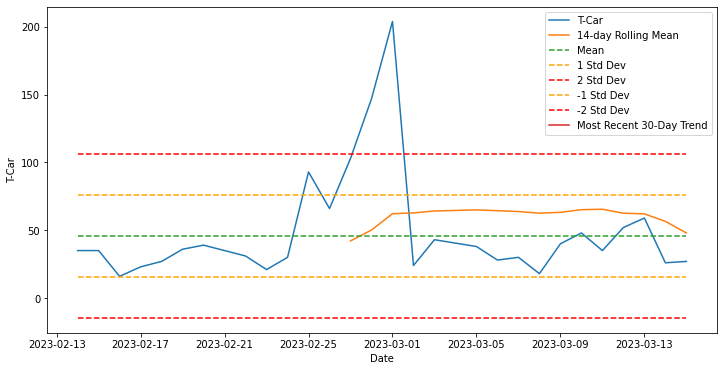

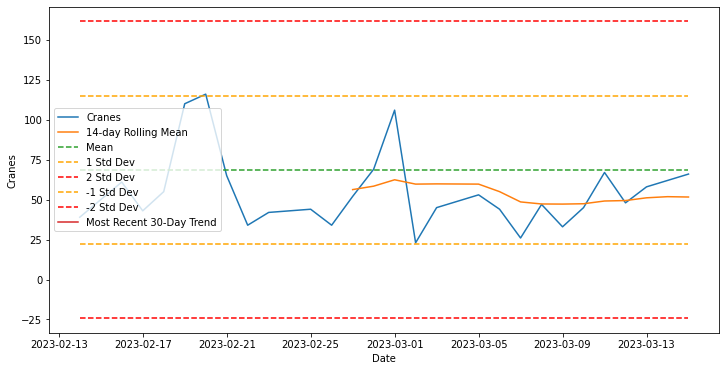

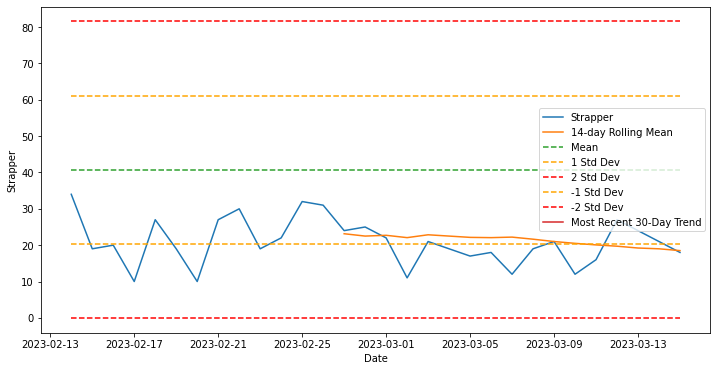

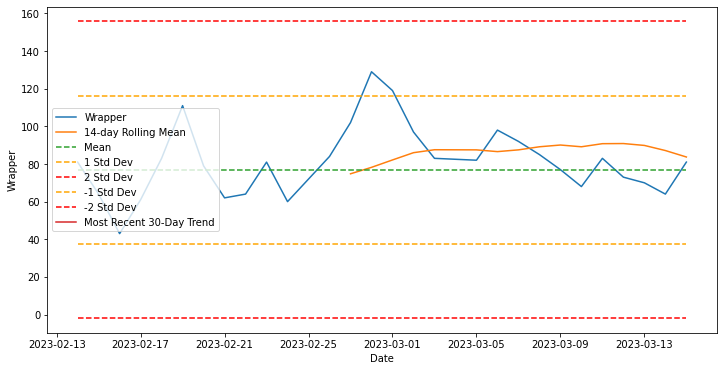

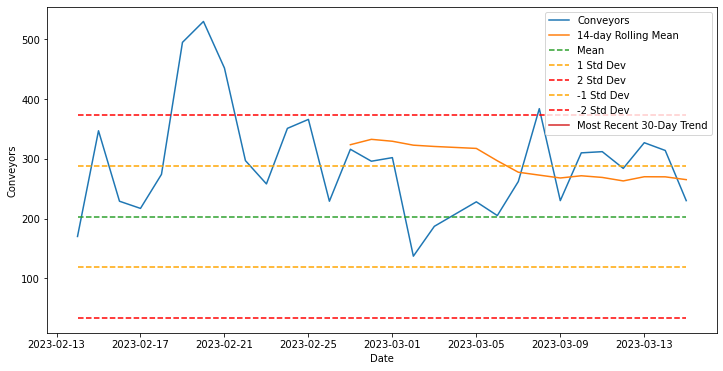

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data into a pandas DataFrame
df = pd.read_csv("stops.csv", parse_dates=[0], index_col=0)

# Calculate the mean and standard deviation for each column
means = df.mean()
stds = df.std()

# Create a line chart for each column
for col in df.columns[1:]:
    fig, ax = plt.subplots(figsize=(12,6))
    df_recent = df.tail(30)
    ax.plot(df_recent.index, df_recent[col], label=col)
    ax.plot(df_recent.index, df_recent[col].rolling(window=14).mean(), label='14-day Rolling Mean')
    ax.plot(df_recent.index, [means[col]] * len(df_recent), label='Mean', linestyle='--')
    ax.plot(df_recent.index, [means[col] + stds[col]] * len(df_recent), label='1 Std Dev', linestyle='--', color='orange')
    ax.plot(df_recent.index, [means[col] + 2*stds[col]] * len(df_recent), label='2 Std Dev', linestyle='--', color='red')
    ax.plot(df_recent.index, [means[col] - stds[col]] * len(df_recent), label='-1 Std Dev', linestyle='--', color='orange')
    ax.plot(df_recent.index, [means[col] - 2*stds[col]] * len(df_recent), label='-2 Std Dev', linestyle='--', color='red')
    x_recent = df_recent.index.astype(np.int64) // 10 ** 9  # Convert datetime to Unix timestamp
    y_recent = df_recent[col]
    ax.plot(x_recent, np.poly1d(np.polyfit(x_recent, y_recent, 1))(x_recent), label='Most Recent 30-Day Trend')
    ax.set_xlabel('Date')
    ax.set_ylabel(col)
    ax.legend()

# Display the plot
plt.show()


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


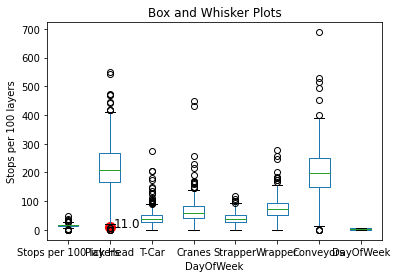

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a pandas DataFrame
df = pd.read_csv("stops.csv", parse_dates=["Date"], index_col=0)

# Add a new column with the day of the week (0=Monday, 1=Tuesday, etc.)
df['DayOfWeek'] = df.index.dayofweek

# Create a new DataFrame with only the data for the most recent day
most_recent_day = df.loc[df.index == df.index.max()].copy()
most_recent_day.loc[:, 'DayOfWeek'] = most_recent_day.index.dayofweek

# Box and whisker plots
fig, ax = plt.subplots()
df.drop(columns=['Sum']).boxplot(ax=ax)
most_recent_day.plot(ax=ax, kind='scatter', x='DayOfWeek', y='Stops per 100 layers', color='red', s=100)
for i, row in most_recent_day.iterrows():
    ax.text(row['DayOfWeek'] + 0.1, row['Stops per 100 layers'], str(row['Stops per 100 layers']), fontsize=12)
plt.title('Box and Whisker Plots')
plt.show()



In [24]:
# Get the most recent day of data
most_recent_day = df.loc[df.index == df.index.max()]

# Create a new DataFrame with the percentiles of each column for the most recent day
percentiles = pd.DataFrame(columns=df.columns)
for column in df.columns:
    if column != 'DayOfWeek':
        percentile = round(df[column].rank(pct=True).loc[most_recent_day.index][0], 2)
        percentiles.at[0, column] = percentile

# Display the percentiles
print('Percentiles for the most recent day:')
print(percentiles)


Percentiles for the most recent day:
    Sum Stops per 100 layers Pick Head T-Car Cranes Strapper Wrapper  \
0  0.39                 0.06      0.34   0.2   0.58     0.09     0.6   

  Conveyors DayOfWeek  
0      0.69       NaN  


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
from google.colab import files
uploaded = files.upload()